In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
data = pd.read_csv('C:/Users/Admin/Desktop/Data Science/Project P166/AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
# convert date column into datetime format
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [5]:
# set date column as index
data.set_index('Date',inplace=True)

In [6]:
# drop columns irrelevant
data.drop(['Adj Close','Volume'],inplace=True,axis=1)
data.head()

,Open,High,Low,Close
Date,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143
2012-01-04,58.571430,59.240002,58.468571,59.062859
2012-01-05,59.278572,59.792858,58.952858,59.718571
2012-01-06,59.967144,60.392857,59.888573,60.342857
2012-01-09,60.785713,61.107143,60.192856,60.247143


In [7]:
data_close = pd.DataFrame(data['Close'],columns=['Close'])
data_close

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-23,284.000000
2019-12-24,284.269989
2019-12-26,289.910004


In [8]:
data_train = data_close.loc[:'2017-12-29']
data_test = data_close.loc['2018-01-02':]

statespace', 'innovations_mle', 'hannan_rissanen',
    'burg', 'innovations', and 'yule_walker'

In [9]:
model_arima = ARIMA(data_train['Close'],order=(5,1,1))
result = model_arima.fit()
result.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -2793.482
Date:                Mon, 05 Dec 2022   AIC                           5600.964
Time:                        08:58:05   BIC                           5638.194
Sample:                             0   HQIC                          5614.830
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0132      6.117      0.002      0.998     -11.977      12.003
ar.L2         -0.0324      0.165     -0.197      0.844      -0.355       0.290
ar.L3         -0.0215      0.200     -0.107      0.914      -0.414       0.371
ar.L4          0.0222      0.132      0.169      0.866      -0.236       0.280
ar.L5          0.0041      0.139      0.029      0.977      -0.268       0.276
ma.L1          0.0133      6.115      0.002      0.998     -11.972      11.999
sigma2         2.3797      0.054     44.297      0.000       2.274       2.485
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               854.46
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
test_pred = pd.DataFrame(result.predict(1510,2011))
test_pred.index = data_test.index
test_pred.columns=data_test.columns
test_pred

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Close
Date,
2018-01-02,169.094558
2018-01-03,169.150941
2018-01-04,169.115088
2018-01-05,169.100913
2018-01-08,169.100666
...,...
2019-12-23,169.102470
2019-12-24,169.102470
2019-12-26,169.102470


In [11]:
result.forecast(5)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


1509    169.064554
1510    169.094558
1511    169.150941
1512    169.115088
1513    169.100913
Name: predicted_mean, dtype: float64

In [12]:
mse = mean_squared_error(test_pred.Close,data_test.Close)
rmse = np.round(np.sqrt(mse),2)

mape = np.round(mean_absolute_percentage_error(test_pred.Close,data_test.Close),3)


In [13]:
print('\n MAPE = ',rmse)
print('\n MAPE = ', mape)


 MAPE =  41.78

 MAPE =  0.187


In [14]:
model_arima = ARIMA(data_close['Close'],order=(0,1,0))
arima_fit = model_arima.fit()
arima_fit.summary()


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2011
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4371.956
Date:                Mon, 05 Dec 2022   AIC                           8745.913
Time:                        08:58:09   BIC                           8751.519
Sample:                             0   HQIC                          8747.971
                               - 2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.5373      0.070     65.042      0.000       4.401       4.674
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):              3663.83
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               5.23   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:

forecast = arima_fit.predict(len(data_close),len(data_close)+29,typ='levels')
forecast_df = pd.DataFrame(forecast)
forecast_df.columns=['Close']
forecast_df

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Close
2011,291.519989
2012,291.519989
2013,291.519989
2014,291.519989
2015,291.519989
2016,291.519989
2017,291.519989
2018,291.519989
2019,291.519989
2020,291.519989


### SARIMA

In [16]:
model_sarima = sm.tsa.SARIMAX(data_train.Close,order=(1,1,1),seasonal_order=(0,1,0,60),enforce_invertibility=False,
                             enforce_stationarity=False)
sarima_fit = model_sarima.fit()


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [17]:
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1509
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 60)   Log Likelihood               -3183.745
Date:                             Mon, 05 Dec 2022   AIC                           6373.491
Time:                                     08:58:34   BIC                           6389.320
Sample:                                          0   HQIC                          6379.398
                                            - 1509                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9797      0.006    171.414      0.000       0.969       0.991
ma.L1         -1.0026      0.004   -274.557      0.000      -1.010      -0.995
sigma2         4.7458      0.118     40.282      0.000       4.515       4.977
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               469.02
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.11
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
prediction = sarima_fit.predict(len(data_train),len(data_train)+501)
prediction

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


1509    170.982022
1510    170.737253
1511    171.125614
1512    171.037056
1513    171.541522
           ...    
2006    245.996213
2007    248.161838
2008    245.860608
2009    246.932443
2010    251.177281
Name: predicted_mean, Length: 502, dtype: float64

In [19]:
test_prediction= pd.DataFrame(prediction)
test_prediction.columns = ['Close']
test_prediction.index = data_test.index
test_prediction

,Close
Date,
2018-01-02,170.982022
2018-01-03,170.737253
2018-01-04,171.125614
2018-01-05,171.037056
2018-01-08,171.541522
...,...
2019-12-23,245.996213
2019-12-24,248.161838
2019-12-26,245.860608


In [20]:
rmse = np.round(np.sqrt(mean_squared_error(data_test.Close,test_prediction.Close)),2)
mape = np.round(mean_absolute_percentage_error(test_prediction.Close,data_test.Close),3)

print('\n RMSE = ',rmse)
print('\n MAPE = ', mape)


 RMSE =  26.83

 MAPE =  0.102


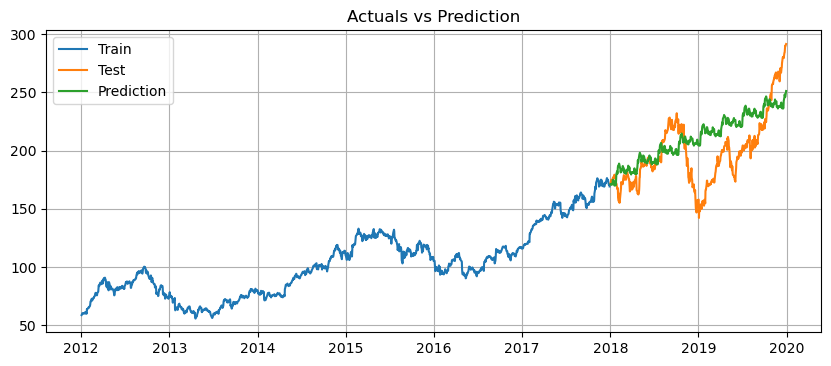

In [21]:
plt.figure(figsize=(10,4), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_prediction, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [22]:
#pip freeze

In [23]:
data_close

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-23,284.000000
2019-12-24,284.269989
2019-12-26,289.910004


In [24]:
data_close['Year'] = data_close.index.year
data_close['Month'] = data_close.index.strftime('%B')
data_close['Quarter'] =  data_close.index.quarter

In [26]:
data_close

,Close,Year,Month,Quarter
Date,,,,
2012-01-03,58.747143,2012,January,1
2012-01-04,59.062859,2012,January,1
2012-01-05,59.718571,2012,January,1
2012-01-06,60.342857,2012,January,1
2012-01-09,60.247143,2012,January,1
...,...,...,...,...
2019-12-23,284.000000,2019,December,4
2019-12-24,284.269989,2019,December,4
2019-12-26,289.910004,2019,December,4


In [27]:
len(data_close[data_close['Quarter']==4])

506

In [28]:
len(data_close.Year.unique())

8

In [29]:
506/8

63.25

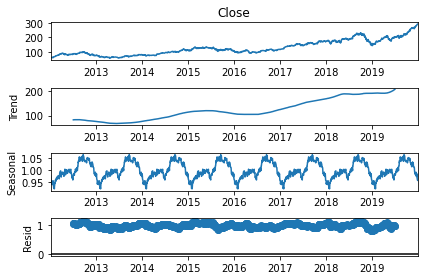

In [30]:
sd = seasonal_decompose(data_close.Close,period=251,model='multiplicative')
sd.plot()
plt.show()

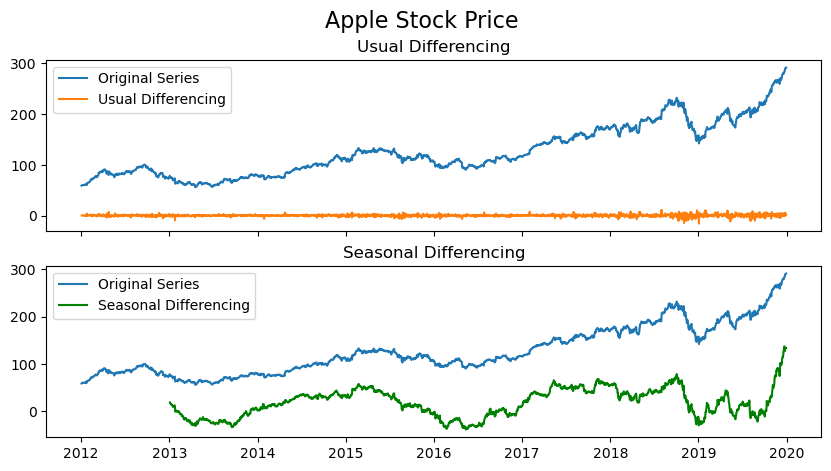

In [31]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data_close.Close, label='Original Series')
axes[0].plot(data_close.Close.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data_close.Close, label='Original Series')
axes[1].plot(data_close.Close.diff(251), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Apple Stock Price', fontsize=16)
plt.show()

## TES

In [32]:
# Since data is non-stationary we are using triple exponential smoothing.
data_ES = data_close
Add_Add = ExponentialSmoothing(data_train['Close'],trend='add',seasonal='add',seasonal_periods=251)
result_1 = Add_Add.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [33]:
test_pred_1 = pd.DataFrame(result_1.forecast(502))
test_pred_1.columns = ['Close']
test_pred_1.index = data_test.index
test_pred_1

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Close
Date,
2018-01-02,168.917737
2018-01-03,168.738488
2018-01-04,168.887275
2018-01-05,169.065434
2018-01-08,168.640705
...,...
2019-12-23,249.684139
2019-12-24,249.639128
2019-12-26,248.617418


In [34]:
rmse_1 = np.round(np.sqrt(mean_squared_error(test_pred_1.Close,data_test.Close)),2)
mape_1 = np.round(mean_absolute_percentage_error(data_test.Close,test_pred_1),2)
print('\n RMSE = ',rmse_1)
print('\n MAPE = ',mape_1)


 RMSE =  27.49

 MAPE =  0.12


In [35]:
# Since data is non-stationary we are using triple exponential smoothing.
Mul_Add = ExponentialSmoothing(data_train['Close'],trend='mul',seasonal='add',seasonal_periods=251)
result_2 = Mul_Add.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [36]:
test_pred_2 = pd.DataFrame(result_2.forecast(502))
test_pred_2.columns = ['Close']
test_pred_2.index = data_test.index
test_pred_2

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Close
Date,
2018-01-02,168.892325
2018-01-03,168.636910
2018-01-04,168.713444
2018-01-05,168.817490
2018-01-08,168.382688
...,...
2019-12-23,238.338943
2019-12-24,238.347957
2019-12-26,237.327629


In [37]:
rmse_2 = np.round(np.sqrt(mean_squared_error(test_pred_2.Close,data_test.Close)),2)
mape_2 = np.round(mean_absolute_percentage_error(data_test.Close,test_pred_2.Close),2)
print('\n RMSE = ',rmse_2)
print('\n MAPE = ',mape_2)


 RMSE =  23.52

 MAPE =  0.1


In [38]:
# Since data is non-stationary we are using triple exponential smoothing.
Add_Mul = ExponentialSmoothing(data_train['Close'],trend='add',seasonal='mul',seasonal_periods=251)
result_3 = Add_Mul.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [39]:
test_pred_3 = pd.DataFrame(result_3.forecast(502))
test_pred_3.columns = ['Close']
test_pred_3.index = data_test.index
test_pred_3

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Close
Date,
2018-01-02,169.554952
2018-01-03,170.601241
2018-01-04,172.002790
2018-01-05,174.481334
2018-01-08,175.180812
...,...
2019-12-23,314.229344
2019-12-24,312.464448
2019-12-26,309.826278


In [40]:
rmse_3 = np.round(np.sqrt(mean_squared_error(test_pred_3.Close,data_test.Close)),2)
mape_3 = np.round(mean_absolute_percentage_error(data_test.Close,test_pred_3.Close),2)
print('\n RMSE = ',rmse_3)
print('\n MAPE = ',mape_3)


 RMSE =  110.04

 MAPE =  0.51


In [41]:
# Since data is non-stationary we are using triple exponential smoothing.
Mul_Mul = ExponentialSmoothing(data_train['Close'],trend='mul',seasonal='mul',seasonal_periods=251)
result_4 = Mul_Mul.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [42]:
test_pred_4 = pd.DataFrame(result_4.forecast(502))
test_pred_4.columns = ['Close']
test_pred_4.index = data_test.index
test_pred_4

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Close
Date,
2018-01-02,169.057016
2018-01-03,169.428099
2018-01-04,170.289709
2018-01-05,172.228086
2018-01-08,172.701074
...,...
2019-12-23,280.580208
2019-12-24,278.904392
2019-12-26,276.346345


In [43]:
rmse_4 = np.round(np.sqrt(mean_squared_error(test_pred_4.Close,data_test.Close)),2)
mape_4 = np.round(mean_absolute_percentage_error(data_test.Close,test_pred_4.Close),2)
print('\n RMSE = ',rmse_4)
print('\n MAPE = ',mape_4)


 RMSE =  86.39

 MAPE =  0.4


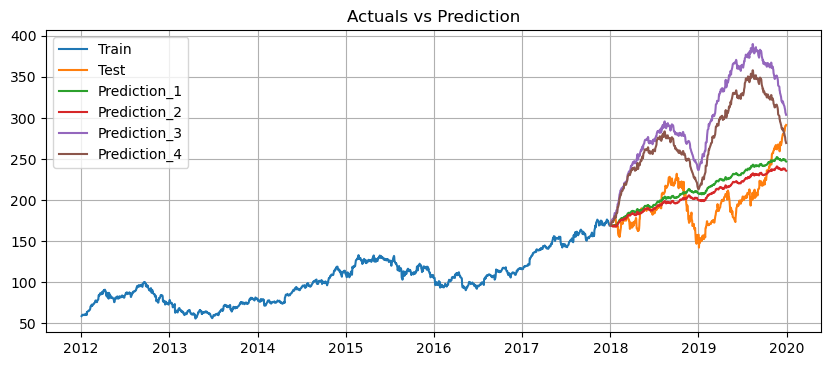

In [44]:
plt.figure(figsize=(10,4), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_pred_1, label='Prediction_1')
plt.plot(test_pred_2, label='Prediction_2')
plt.plot(test_pred_3, label='Prediction_3')
plt.plot(test_pred_4, label='Prediction_4')

plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()